# Example 1

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import uniform

# random seed
np.random.seed(2023)

# Function to calculate the target distribution (beta)
def f(x):
    return beta.pdf(x, a = 6.3, b = 2.7)

In [157]:
n = 10000  # number of draws
c = 2.67  # maximum

# Accept-Reject algorithm
theta = []
for i in range(n):
    x = np.random.uniform(0, 1)
    y = np.random.uniform(0, c)
    acceptance_rate = f(x) / (c * np.random.uniform(0, 1))
    if y <= acceptance_rate:
        theta.append(x)

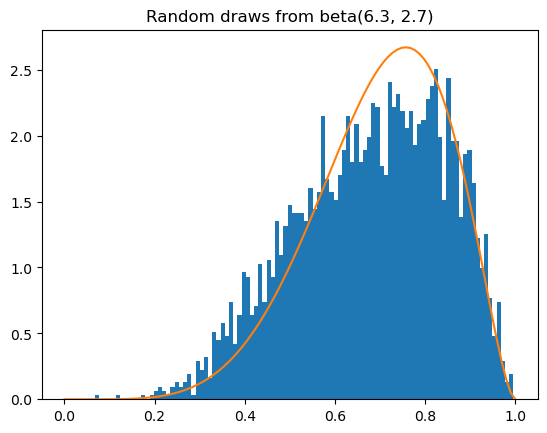

In [158]:
# Plotting the results along with the true distribution
plt.hist(theta, bins=100, density=True)
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a = 6.3, b = 2.7))
plt.title("Random draws from beta(6.3, 2.7)")
plt.show()

In [159]:
# Calculate estimated mean and standard deviation
mean_theta = np.mean(theta)
quantiles = np.percentile(theta, [5, 95])
std_theta = np.std(theta)
[mean_theta, quantiles, std_theta]

[0.6789116134083681, array([0.38501528, 0.91827505]), 0.165699220506413]

In [160]:
# Print the results
print("Estimated mean is equal to", mean_theta)
print("Quantiles (5%, 95%):", quantiles)
print("Standard deviation is equal to", std_theta)

# Check using rbeta function
rbeta_mean = np.mean(np.random.beta(6.3, 2.7, 10000))
rbeta_std = np.std(np.random.beta(6.3, 2.7, 10000))

print("Check - rbeta mean:", rbeta_mean)
print("Check - rbeta standard deviation:", rbeta_std)

Estimated mean is equal to 0.6789116134083681
Quantiles (5%, 95%): [0.38501528 0.91827505]
Standard deviation is equal to 0.165699220506413
Check - rbeta mean: 0.7000721021069835
Check - rbeta standard deviation: 0.14440767603379123


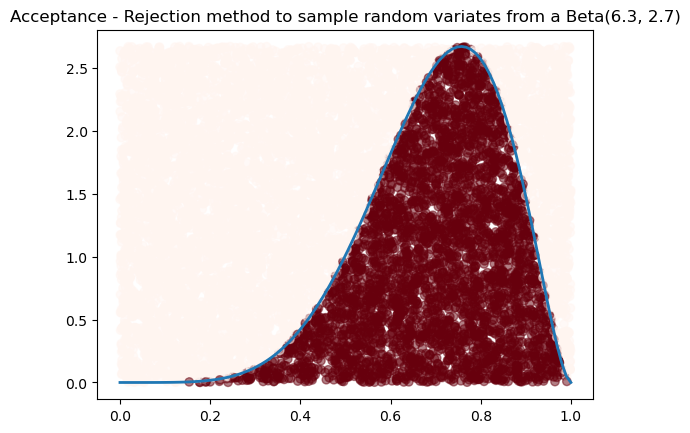

In [161]:
points = np.random.uniform(0, 1, n)
uniforms = np.random.uniform(0, 1, n)
accept = uniforms < (f(points) / (c * uniform.pdf(points)))

# Plotting
x_vals = np.linspace(0, 1, 100)
plt.plot(x_vals, f(x_vals), linewidth=2, label='f')
plt.scatter(points, c * uniforms, marker='o', c=accept, cmap='Reds', alpha = 0.5)
plt.title("Acceptance - Rejection method to sample random variates from a Beta(6.3, 2.7)")
plt.show()

## Example 2

In [162]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.stats import uniform

# random seed
np.random.seed(2023)

# Function to calculate the target distribution (beta)
def f(x):
    return (1/x *np.exp(-13*x) * (1-np.exp(-x))**10 )

def g(x):
    return (np.exp(-x))

In [163]:
n = 10000  # number of draws
c = 5 * 10**(-7) # maximum

# Accept-Reject algorithm
theta = []
for i in range(n):
    x = np.random.uniform(0, 1)
    y = np.random.uniform(0, c)
    acceptance_rate = f(x) / (c * g(x))
    if y <= acceptance_rate:
        theta.append(x)

In [164]:
# Calculate Expected Survival Time (EST)
mean_theta = 1/np.mean(theta)
mean_theta

1.935258913103203

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17776\2388118919.py:11: RuntimeWarning: divide by zero encountered in divide
  return (1/x *np.exp(-13*x) * (1-np.exp(-x))**10 )
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17776\2388118919.py:11: RuntimeWarning: invalid value encountered in multiply
  return (1/x *np.exp(-13*x) * (1-np.exp(-x))**10 )


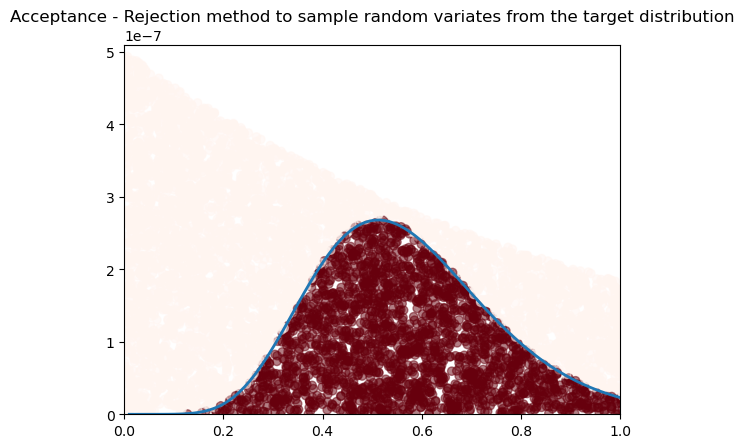

In [165]:
points = np.random.exponential(size = n)
uniforms = np.random.uniform(0, c*g(points), n)
accepted = uniforms < f(points) 

# Plotting
x_vals = np.linspace(0, 1, 100)
plt.plot(x_vals, f(x_vals), linewidth=2, label='f')
plt.scatter(points, uniforms, marker='o', c=accepted, cmap='Reds', alpha = 0.5)
plt.xlim([0, 1])
plt.ylim([0, c+0.00000001])
plt.title("Acceptance - Rejection method to sample random variates from the target distribution")
plt.show()